In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import squarify
import geopandas as gpd
import os

In [151]:
# Reading in Excel File
df = pd.read_excel('F:\\OMDENA\\Texas\\Clean_IncomePovertyStats.xlsx', usecols="B:H")

In [152]:
df.head()

,County,Per_Capita_Income,Total_Personal_Income,Median_Household_Income,Average_Annual_Pay,%_of_Population_in_Poverty,%_of_Population_Under_18_in_Poverty
0,Anderson,36027,2080020000,48461,45799,19.8,23.8
1,Andrews,51769,968334000,74918,69845,10.2,12.7
2,Angelina,39644,3437761000,51750,40974,15.6,22.6
3,Aransas,51614,1213451000,53085,39316,18.7,32.1
4,Archer,52335,447617000,63731,38006,10.3,12.8


Note: The code below for the choropleth maps has been sourced from https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630.  Some modifications have been made to customize the code for the purpose of this project. 

In [153]:
# Reading in the SHP file for Texas geospatial data 
# https://github.com/OmdenaAI/omdena-texas-homelessness/blob/main/src/not_encoded_data/County.shp
fp = "F:\\OMDENA\\Texas\\County.SHP"
map_df = gpd.read_file(fp)

# Check the GeoDataframe
map_df.head()
map_df

,FID,GID,CMPTRL_NBR,CNTY_NM,DIST_NM,DPS_NBR,CNTY_FIPS,CNTY_NBR,DIST_NBR,MSA1990,MSA2000,MSA2010,SHAPE_Leng,SHAPE_Area,geometry
0,1,29,7,Atascosa,San Antonio,7,48013,7,15,Y,Y,Y,2.273611,0.291801,"POLYGON ((-98.25038 28.67505, -98.31935 28.624..."
1,2,30,158,Matagorda,Yoakum,161,48321,158,13,N,N,N,8.747461,0.272800,"MULTIPOLYGON (((-95.84101 29.17299, -95.84089 ..."
2,3,31,120,Jackson,Yoakum,120,48239,121,13,N,Y,Y,2.989532,0.203835,"MULTIPOLYGON (((-96.36618 29.01247, -96.36138 ..."
3,4,32,62,De Witt,Yoakum,62,48123,62,13,N,N,N,2.065559,0.218449,"POLYGON ((-97.24011 29.38455, -97.23063 29.374..."
4,5,33,247,Wilson,San Antonio,247,48493,247,15,Y,Y,Y,1.917176,0.193944,"POLYGON ((-98.13515 29.43866, -98.13512 29.438..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,252,98,Hansford,Amarillo,98,48195,99,4,N,N,N,1.965539,0.239189,"POLYGON ((-101.57833 36.49972, -101.54967 36.4..."
250,251,253,211,Sherman,Amarillo,211,48421,211,4,N,N,N,1.967992,0.239757,"POLYGON ((-101.62346 36.06749, -101.62346 36.0..."
251,252,254,56,Dallam,Amarillo,56,48111,56,4,N,N,N,2.647749,0.391035,"POLYGON ((-102.16302 36.06975, -102.16289 36.0..."
252,253,248,171,Moore,Amarillo,171,48341,171,4,N,N,N,1.949868,0.234984,"POLYGON ((-102.13873 36.05529, -102.13573 36.0..."


<AxesSubplot:>

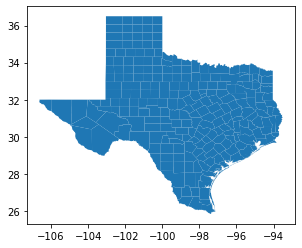

In [154]:
# Plotting the SHP 
map_df.plot()
#plt.rcParams['figure.figsize'] = [50, 70] #height, width
#map_df.plot()

In [155]:
df_chloro = df
df_chloro.head()

,County,Per_Capita_Income,Total_Personal_Income,Median_Household_Income,Average_Annual_Pay,%_of_Population_in_Poverty,%_of_Population_Under_18_in_Poverty
0,Anderson,36027,2080020000,48461,45799,19.8,23.8
1,Andrews,51769,968334000,74918,69845,10.2,12.7
2,Angelina,39644,3437761000,51750,40974,15.6,22.6
3,Aransas,51614,1213451000,53085,39316,18.7,32.1
4,Archer,52335,447617000,63731,38006,10.3,12.8


In [156]:
# Merging the GeoDataFrame with the IncomePovertyStats DataFrame
dfm = pd.concat([df_chloro, map_df], axis=1)
dfm = map_df.merge(df_chloro, how='left', left_on="CNTY_NM", right_on="County")
dfm.info()
dfm.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   FID                                  254 non-null    int64   
 1   GID                                  254 non-null    int64   
 2   CMPTRL_NBR                           254 non-null    int64   
 3   CNTY_NM                              254 non-null    object  
 4   DIST_NM                              254 non-null    object  
 5   DPS_NBR                              254 non-null    int64   
 6   CNTY_FIPS                            254 non-null    object  
 7   CNTY_NBR                             254 non-null    int64   
 8   DIST_NBR                             254 non-null    int64   
 9   MSA1990                              254 non-null    object  
 10  MSA2000                              254 non-null    object  
 11  MSA2010    

,FID,GID,CMPTRL_NBR,CNTY_NM,DIST_NM,DPS_NBR,CNTY_FIPS,CNTY_NBR,DIST_NBR,MSA1990,...,SHAPE_Leng,SHAPE_Area,geometry,County,Per_Capita_Income,Total_Personal_Income,Median_Household_Income,Average_Annual_Pay,%_of_Population_in_Poverty,%_of_Population_Under_18_in_Poverty
0,1,29,7,Atascosa,San Antonio,7,48013,7,15,Y,...,2.273611,0.291801,"POLYGON ((-98.25038 28.67505, -98.31935 28.624...",Atascosa,37644,1925578000,57309,55264,14.7,19.0
1,2,30,158,Matagorda,Yoakum,161,48321,158,13,N,...,8.747461,0.272800,"MULTIPOLYGON (((-95.84101 29.17299, -95.84089 ...",Matagorda,45237,1657614000,49276,56298,17.5,24.1
2,3,31,120,Jackson,Yoakum,120,48239,121,13,N,...,2.989532,0.203835,"MULTIPOLYGON (((-96.36618 29.01247, -96.36138 ...",Jackson,46596,687760000,55800,47038,13.8,18.4
3,4,32,62,De Witt,Yoakum,62,48123,62,13,N,...,2.065559,0.218449,"POLYGON ((-97.24011 29.38455, -97.23063 29.374...",De Witt,59389,1197273000,52544,47891,17.1,24.3
4,5,33,247,Wilson,San Antonio,247,48493,247,15,Y,...,1.917176,0.193944,"POLYGON ((-98.13515 29.43866, -98.13512 29.438...",Wilson,46448,2372083000,76905,41496,8.3,11.7


#Choropleth Visualizations

<AxesSubplot:title={'center':'Per Capita Income by County'}>

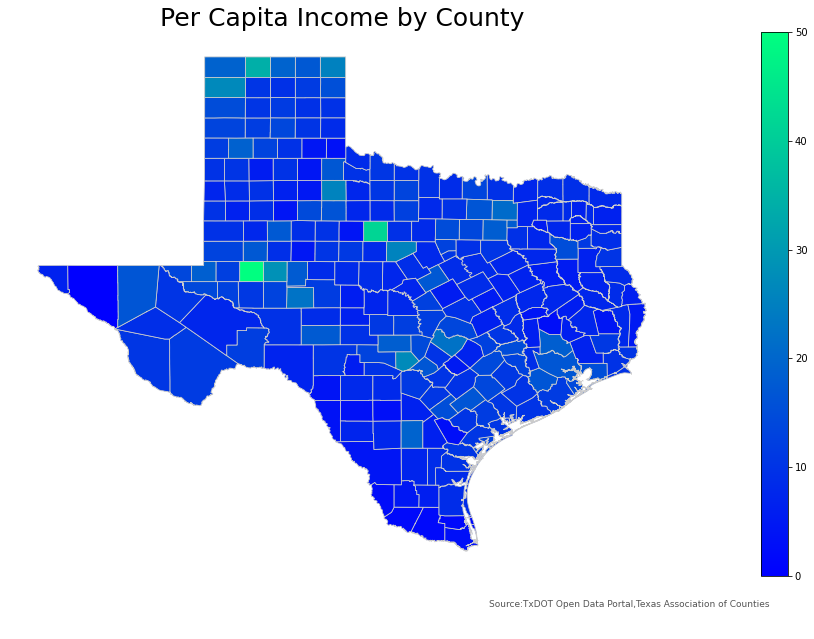

In [168]:
# set the value column that will be visualised
variable = 'Per_Capita_Income'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Per Capita Income by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='winter', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) 

# add the colorbar to the figure
fig.colorbar(sm)

# create map
dfm.plot(column=variable, cmap='winter', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Total Personal Income by County'}>

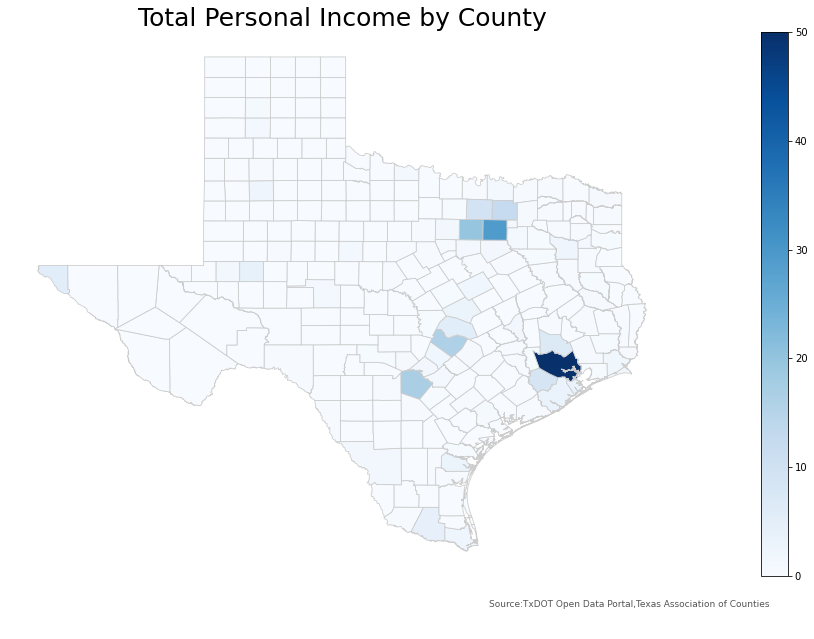

In [169]:
# set the value column that will be visualised
variable = 'Total_Personal_Income'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Total Personal Income by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) 

# add the colorbar to the figure
fig.colorbar(sm)

# create map
dfm.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Median Household Income by County'}>

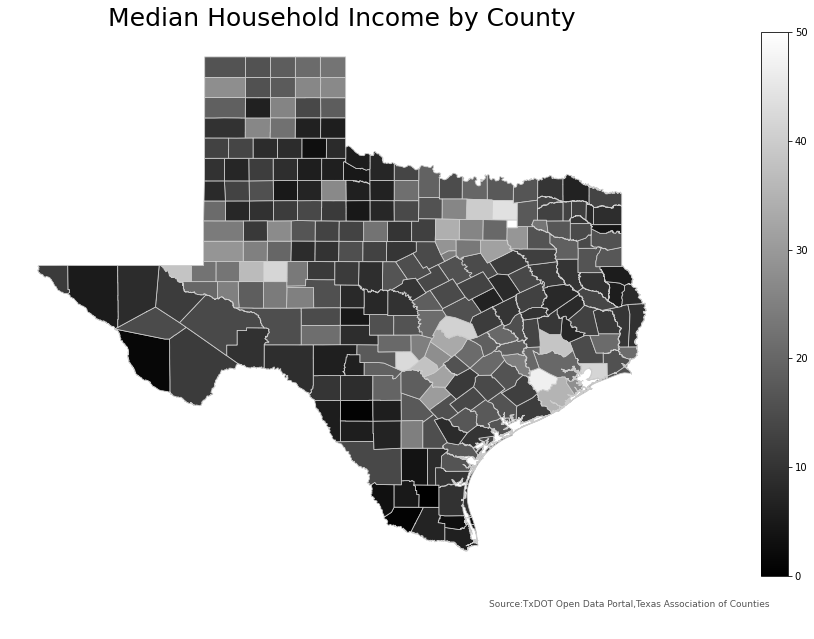

In [170]:
# set the value column that will be visualised
variable = 'Median_Household_Income'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Median Household Income by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='gray', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm)

# create map
dfm.plot(column=variable, cmap='gray', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'Median Household Income by County'}>

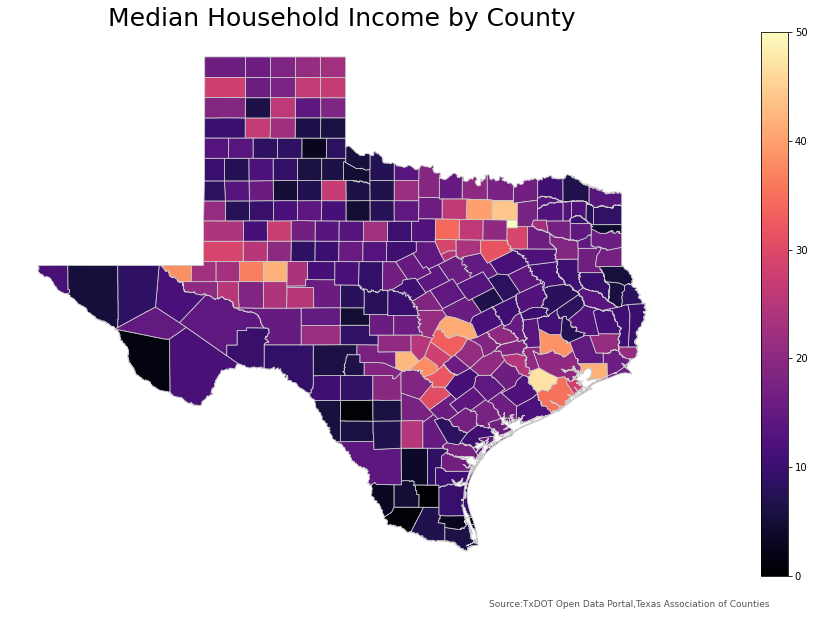

In [171]:
# set the value column that will be visualised
variable = 'Median_Household_Income'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Median Household Income by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm)

# create map
dfm.plot(column=variable, cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8')

"dfm['coords'] = dfm['geometry'].apply(lambda x: x.representative_point().coords[:])\ndfm['coords'] = [coords[0] for coords in dfm['coords']]\nfor idx, row in dfm.iterrows():\n    plt.annotate(s=row['County'], xy=row['coords'],horizontalalignment='center')"

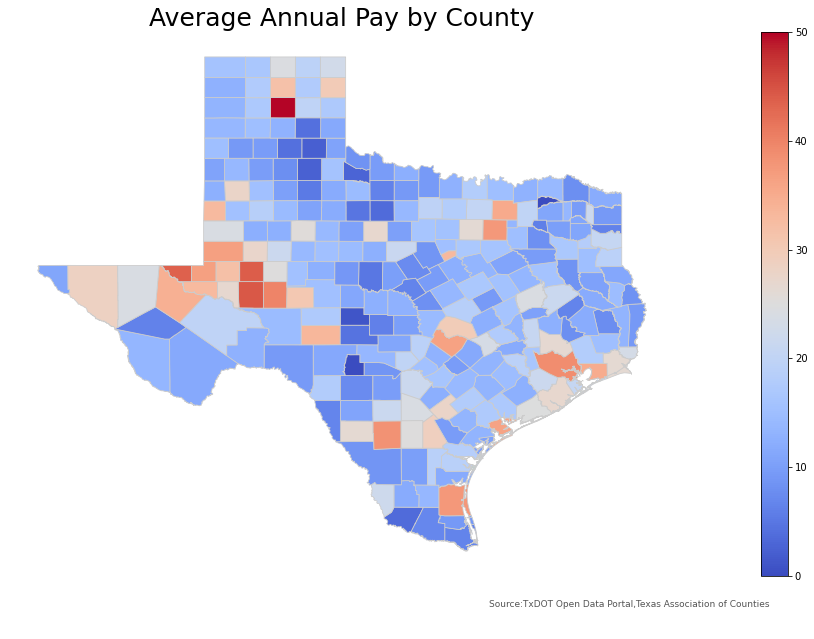

In [172]:
# set the value column that will be visualised
variable = 'Average_Annual_Pay'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Average Annual Pay by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) 

# add the colorbar to the figure
fig.colorbar(sm)

# create map
dfm.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
'''dfm['coords'] = dfm['geometry'].apply(lambda x: x.representative_point().coords[:])
dfm['coords'] = [coords[0] for coords in dfm['coords']]
for idx, row in dfm.iterrows():
    plt.annotate(s=row['County'], xy=row['coords'],horizontalalignment='center')'''

<AxesSubplot:title={'center':'% of Population in Poverty by County'}>

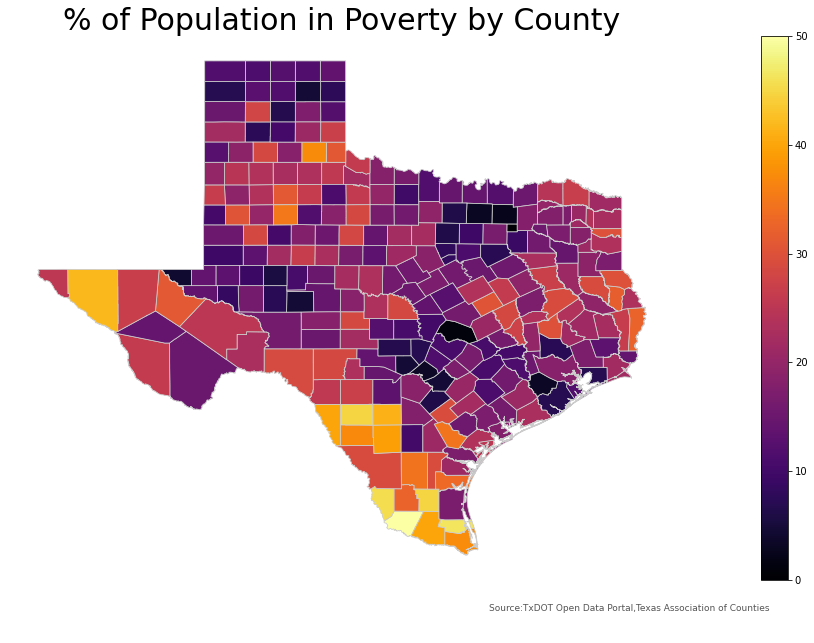

In [173]:
# set the value column that will be visualised
variable = '%_of_Population_in_Poverty'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('% of Population in Poverty by County', fontdict={'fontsize': '30', 'fontweight' : '4'})
ax.annotate('Source:TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

# add the colorbar to the figure
fig.colorbar(sm)

# create map
dfm.plot(column=variable, cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8')

"# Add Labels\ndfm['coords'] = dfm['geometry'].apply(lambda x: x.representative_point().coords[:])\ndfm['coords'] = [coords[0] for coords in dfm['coords']]\nfor idx, row in dfm.iterrows():\n    plt.annotate(s=row['County'], xy=row['coords'],horizontalalignment='center')"

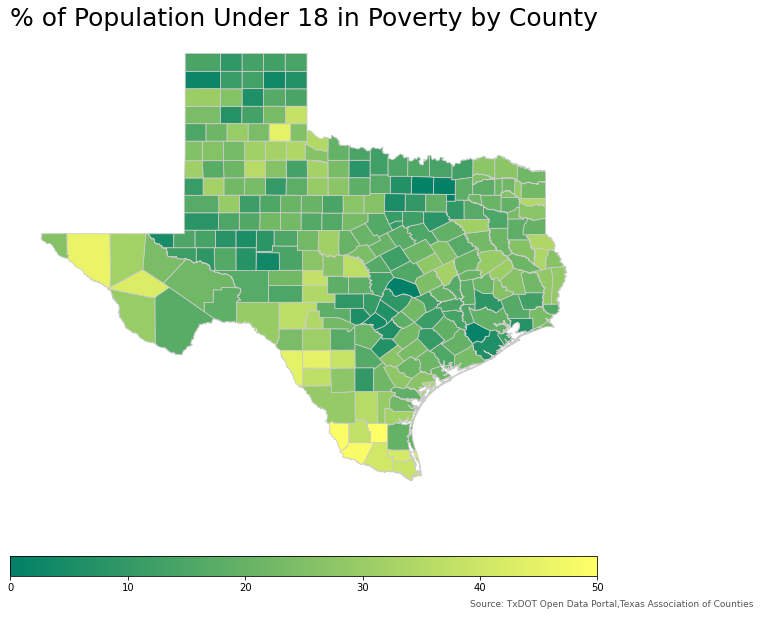

In [174]:
# set the value column that will be visualised
variable = '%_of_Population_Under_18_in_Poverty'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('% of Population Under 18 in Poverty by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: TxDOT Open Data Portal,Texas Association of Counties', xy=(0.6, .05), xycoords='figure fraction', fontsize=9, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) 

# add a horizontal colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
dfm.plot(column=variable, cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8')

'''# Add Labels
dfm['coords'] = dfm['geometry'].apply(lambda x: x.representative_point().coords[:])
dfm['coords'] = [coords[0] for coords in dfm['coords']]
for idx, row in dfm.iterrows():
    plt.annotate(s=row['County'], xy=row['coords'],horizontalalignment='center')'''
  

Note: The code above for the choropleth maps has been sourced from https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630.  Some modifications have been made to customize the code for the purpose of this project. 